# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 6 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.loc'] = 'best'

## Esercizio 06.1: <span style="color:brown"> Modello di Ising 1D </span>

### Soluzioni analitiche
Vengono riportate le soluzioni analitiche per il modello di Ising unidimensionale. Queste saranno usate successivamente per fare un confronto con i risultati ottenuti dalle simulazioni Monte Carlo.\
Sono stati utilizzati i seguenti parametri: $J=1$, $N_{spin}=50$. Inoltre tutte le quantità sono state calcolate a campo magnetico nullo, tranne la magnetizzazione $M$ che è stata calcolata con $h=0.02.$

In [3]:
#analytic solutions
points = 100
T = np.linspace(0.4, 2.2, num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN = th**Ns
ch = 1/th
h = 0.02 #only for m

b = beta
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns

#internal energy (h = 0)
E = -J*( th + ch*thN )/( 1 + thN )

#heat capacity (h = 0)
Heat =((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#magnetic susceptibility (h = 0)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#magnetisation (h != 0)
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

### Risultati
Nel seguito sono riportati i grafici con i risultati delle simulazioni Monte Carlo (valori medi ed errori), ottenuti campionando il peso di Boltzmann $p = \exp(-\beta H)\,/\,Z$ sia con l'algoritmo di Metropolis che con l'algoritmo di Gibbs.\
Le simulazioni sono state fatte con $M = 10^6$ steps divisi in $N=50$ blocchi, per ciascun metodo di campionamento e le quantità fisiche sono state calcolate usando il *data blocking*.\
I risultati sono riportati in funzione della temperatura $T$, di cui sono stati scelti $61$ valori nell'intervallo $[0.5, 2.0]$; questo permette il confronto dei risultati con le soluzioni analitiche.

**Osservazione:** Prima dell'inizio delle misurazioni delle quantità di interesse, il sistema è stato fatto equilibrare per $500$ steps Monte Carlo.\
Inoltre, tutti i risultati sono riportati avendo considerato $k_B = 1$ e $\mu_B = 1$.

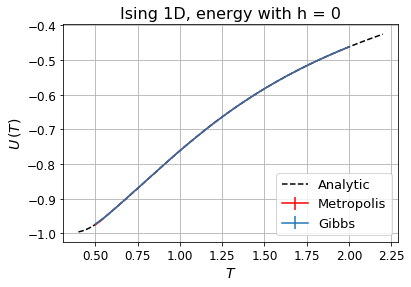

In [4]:
#load data - internal energy
ave_E, err_E = np.loadtxt('ISING_1D/output.ene.metro.final', dtype=float, unpack='true', usecols=(2,3))
ave_E_g, err_E_g = np.loadtxt('ISING_1D/output.ene.gibbs.final', dtype=float, unpack='true', usecols=(2,3))
temp = np.linspace(0.5, 2.0, num=len(ave_E))

#make plot
plt.errorbar(temp, ave_E, yerr=err_E, color='red', label='Metropolis')
plt.errorbar(temp, ave_E_g, yerr=err_E_g, label='Gibbs')
plt.plot(T, E, color='black', linestyle='dashed', label='Analytic')
plt.title(f'Ising 1D, energy with h = 0')
plt.xlabel(f'$T$')
plt.ylabel(f'$U\,(T)$')
plt.legend(loc='lower right', prop={'size': 13})
plt.grid(True)
plt.show()

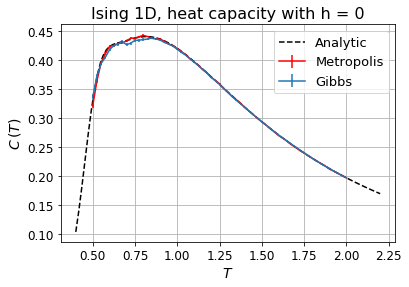

In [5]:
#load data - heat capacity
ave_heat, err_heat = np.loadtxt('ISING_1D/output.heat.metro.final', dtype=float, unpack='true', usecols=(2,3))
ave_heat_g, err_heat_g = np.loadtxt('ISING_1D/output.heat.gibbs.final', dtype=float, unpack='true', usecols=(2,3))

#make plot
plt.errorbar(temp, ave_heat, yerr=err_heat, color='red', label='Metropolis')
plt.errorbar(temp, ave_heat_g, yerr=err_heat_g, label='Gibbs')
plt.plot(T, Heat, color='black', linestyle='dashed', label='Analytic')
plt.title(f'Ising 1D, heat capacity with h = 0')
plt.xlabel(f'$T$')
plt.ylabel(f'$C\,(T)$')
plt.legend(prop={'size': 13})
plt.grid(True)
plt.show()

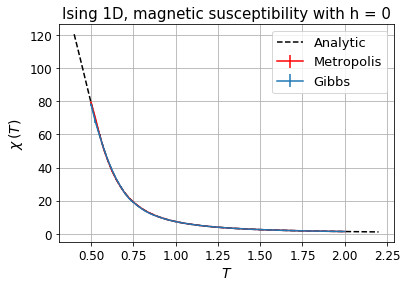

In [6]:
#load data - magnetic susceptibility
ave_X, err_X = np.loadtxt('ISING_1D/output.chi.metro.final', dtype=float, unpack='true', usecols=(2,3))
ave_X_g, err_X_g = np.loadtxt('ISING_1D/output.chi.gibbs.final', dtype=float, unpack='true', usecols=(2,3))

#make plot
plt.errorbar(temp, ave_X, yerr=err_X, color='red', label='Metropolis')
plt.errorbar(temp, ave_X_g, yerr=err_X_g, label='Gibbs')
plt.plot(T, X, color='black', linestyle='dashed', label='Analytic')
plt.title(f'Ising 1D, magnetic susceptibility with h = 0', size=15)
plt.xlabel(f'$T$')
plt.ylabel(f'$\chi\,(T)$')
plt.legend(prop={'size': 13})
plt.grid(True)
plt.show()

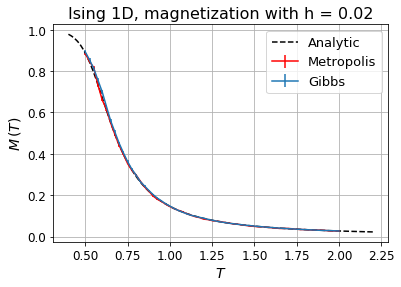

In [7]:
#load data - magnetization
ave_m, err_m = np.loadtxt('ISING_1D/output.mag.metro002.final', dtype=float, unpack='true', usecols=(2,3))
ave_m_g, err_m_g = np.loadtxt('ISING_1D/output.mag.gibbs002.final', dtype=float, unpack='true', usecols=(2,3))

#make plot
plt.errorbar(temp, ave_m, yerr=err_m, color='red', label='Metropolis')
plt.errorbar(temp, ave_m_g, yerr=err_m_g, label='Gibbs')
plt.plot(T, M, color='black', linestyle='dashed', label='Analytic')
plt.title(f'Ising 1D, magnetization with h = 0.02')
plt.xlabel(f'$T$')
plt.ylabel(f'$M\,(T)$')
plt.legend(prop={'size': 13})
plt.grid(True)
plt.show()

Si nota come tutte le quantità fisiche calcolate siano in ottimo accordo con le soluzioni teoriche per il modello sia nel caso di campionamento con il Metropolis che con l'algoritmo di Gibbs. L'unica parte in cui si notano delle differenze è nel picco della capacità termica, intorno alla temperatura $T=0.75$, ma solo nel caso del Metropolis; tuttavia non si tratta di differenze significative.